2.4.1
x_train.shape:  (60000, 32, 32)
y_train.shape:  (60000,)
x_test.shape:  (10000, 32, 32)
y_test.shape:  (10000,)


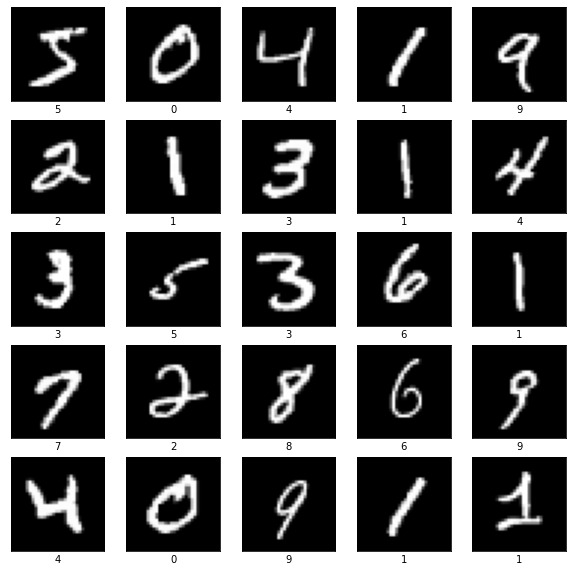

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)             

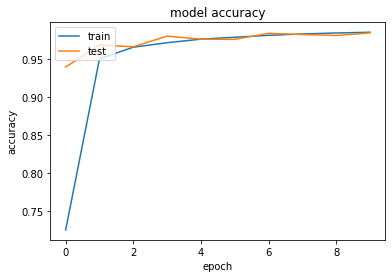

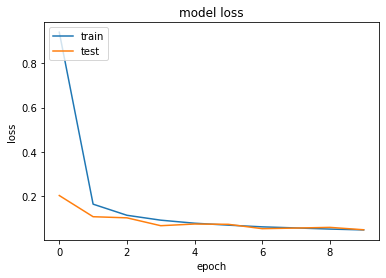

In [14]:
import tensorflow as tf
import datetime
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# Loading MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Padding in order to make images 32 x 32
paddings = tf.constant([[0,0], [2,2], [2,2]])
x_train = tf.pad(x_train, paddings, constant_values = 0)
x_test = tf.pad(x_test, paddings, constant_values = 0)

print('x_train.shape: ',x_train.shape)
print('y_train.shape: ',y_train.shape)
print('x_test.shape: ',x_test.shape)
print('y_test.shape: ',y_test.shape)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Convert images into float32
x_train = tf.dtypes.cast(x_train,tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)

# Normalize image pixels
x_train, x_test, = x_train[...,np.newaxis]/255, x_test[..., np.newaxis]/255

# Plot first 25 training images
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(tf.reshape(x_train[i], [32,32]), cmap = plt.cm.gray)
  plt.xlabel(class_names[y_train[i]])
plt.show()

# Define a sequential model
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32,32,1)))  # C32
model.add(layers.MaxPool2D((2, 2)))                                               # Max pooling (2 x 2)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                           # C64
model.add(layers.MaxPool2D((2, 2)))                                               # Max pooling (2 x 2)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                           # C64
model.add(layers.MaxPool2D((2, 2)))                                               # Max pooling (2 x 2)
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))                                   # F64
model.add(layers.Dense(10))                                                       # F10

# Compile the model
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9)
model.compile(optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])
print(model.summary())

log_dir = ".\\logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Enable visualization for TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)
# Train the model for a  given epochs
history = model.fit(x_train, y_train, epochs = 10, batch_size = 50, validation_data=(x_test, y_test), callbacks = [tensorboard_callback])
# Evaluate the model after training
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print("\nTest accuracy: ", test_acc)

# Plot History  for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()